# Разработка предсказательной модели оттока клиентов банка

Банк «Бета-Банк» столкнулся с проблемой оттока клиентов. Банковские маркетологи считают, что сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. В нашем распоряжении данные о поведении клиентов и расторжении договоров с банком. 

<font color='green'>Цель</font>

Нужно построить модель, которая предскажет уйдёт клиент из банка или нет. 

Основная метрика эффективности - `f1 мера`.

<font color='green'>Задачи</font>

Поставлена задача классификации. Этапы выполнения:

- подготовить данные;
- исследовать данные;
- проработать проблему дисбаланса классов;
- исследовать качество следующих моделей:
  
      1) Логистическая регрессия
      2) Решающее дерево
      3) Cлучайный лес      
      
- достигнуть значения метрики `f1` на тестовой выборке не менее 0,59. 

<font color='green'>Файлы</font>

- `Churn.csv`

<font color='green'>Признаки</font>

- `RowNumber` — индекс строки в данных;
- `CustomerId` — уникальный идентификатор клиента;
- `Surname` — фамилия;
- `CreditScore` — кредитный рейтинг;
- `Geography` — страна проживания;
- `Gender` — пол;
- `Age` — возраст;
- `Tenure` — сколько лет человек является клиентом банка;
- `Balance` — баланс на счёте;
- `NumOfProducts` — количество продуктов банка, используемых клиентом;
- `HasCrCard` — наличие кредитной карты;
- `IsActiveMember` — активность клиента;
- `EstimatedSalary` — предполагаемая зарплата.

<font color='green'>Целевой признак</font>

- `Exited` — факт ухода клиента.

<font color='green'>Содержание</font>

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выбор модели</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span><ul class="toc-item"><li><span><a href="#Подбор-параметров-без-устранения-дисбаланса" data-toc-modified-id="Подбор-параметров-без-устранения-дисбаланса-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Подбор параметров без устранения дисбаланса</a></span></li><li><span><a href="#Подбор-параметров-с-устранением-дисбаланса" data-toc-modified-id="Подбор-параметров-с-устранением-дисбаланса-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Подбор параметров с устранением дисбаланса</a></span></li></ul></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Решающее дерево</a></span><ul class="toc-item"><li><span><a href="#Подбор-параметров-без-устранения-дисбаланса" data-toc-modified-id="Подбор-параметров-без-устранения-дисбаланса-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Подбор параметров без устранения дисбаланса</a></span></li><li><span><a href="#Подбор-параметров-с-устранением-дисбаланса" data-toc-modified-id="Подбор-параметров-с-устранением-дисбаланса-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Подбор параметров с устранением дисбаланса</a></span></li></ul></li><li><span><a href="#Cлучайный-лес" data-toc-modified-id="Cлучайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cлучайный лес</a></span><ul class="toc-item"><li><span><a href="#Подбор-параметров-без-устранения-дисбаланса" data-toc-modified-id="Подбор-параметров-без-устранения-дисбаланса-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Подбор параметров без устранения дисбаланса</a></span></li><li><span><a href="#Подбор-параметров-с-устранением-дисбаланса" data-toc-modified-id="Подбор-параметров-с-устранением-дисбаланса-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Подбор параметров с устранением дисбаланса</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Модель-decision_tree_balance" data-toc-modified-id="Модель-decision_tree_balance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Модель decision_tree_balance</a></span></li><li><span><a href="#Модель-random_forest_disbalance" data-toc-modified-id="Модель-random_forest_disbalance-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Модель random_forest_disbalance</a></span></li><li><span><a href="#Модель-random_forest_balance" data-toc-modified-id="Модель-random_forest_balance-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Модель random_forest_balance</a></span></li></ul></li></ul></div>

## Подготовка данных

In [1]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

import sweetviz as sv # для EDA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/ML/datasets/Churn.csv')

In [3]:
data.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2.0,1.0,8.0,1.0,2.0
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


Сформируем новый датасет с нужной для анализа информацией. 

In [4]:
df = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


Приведем названия столбцов к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

Сформируем отчет для исследовательского анализа данных.

In [6]:
report = sv.analyze(df)
#report.show_notebook()
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Наблюдается дисбаланс классов. В столбце `'tenure'` имеются пропуски. Дубликаты не выявлены.

In [7]:
df[df['tenure'].isna()].head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


Явная закономерность в пропусках не прослеживается. Из-за достаточно высокой доли пропущенных значений (`9%`) не будем удалять данные, а заполним пропуски нулями.

In [8]:
df.fillna(value = 0, inplace = True)
df[df['tenure'].isna()]

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


Преобразуем категориальные признаки методом One-Hot Encoding.

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df.head(3)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   numofproducts      10000 non-null  int64  
 5   hascrcard          10000 non-null  int64  
 6   isactivemember     10000 non-null  int64  
 7   estimatedsalary    10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


**Вывод**

Для дальнейшей работы принято решение не использовать даные из столбцов: `'RowNumber'`, `'CustomerId'`, `'Surname'`.
В столбце `'tenure'` выявлены пропуски (9%), которые заменены целочисленным значением `'0'`. Наблюдается несбалансированность классов целевого признака: `'0'` - 80% и `'1'` - 20%. Категориальные данные преобразованы с помощью метода OHE.

## Исследование задачи

### Разделение данных на выборки

Выделим признаки и целевой признак. 

In [12]:
features = df.drop(['exited'], axis=1)
target = df['exited']

Разобьём данные на тренировочную, валидационную и тестовую выборки. 

In [13]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)

Проверим размеры полученных файлов. 

In [14]:
print(features_train.shape, target_train.shape, features_valid.shape, target_valid.shape, features_test.shape,\
    target_test.shape)

(6000, 11) (6000,) (2000, 11) (2000,) (2000, 11) (2000,)


Проверим баланс целевого признака.

In [15]:
print(target_train.value_counts(normalize=True))
print(target_valid.value_counts(normalize=True))
print(target_test.value_counts(normalize=True))

0    0.796333
1    0.203667
Name: exited, dtype: float64
0    0.7965
1    0.2035
Name: exited, dtype: float64
0    0.796
1    0.204
Name: exited, dtype: float64


### Масштабирование признаков

Приведем признаки в столбцах `'creditscore'`, `'age'`, `'balance'`, `'estimatedsalary'` к единому масштабу.

In [16]:
pd.options.mode.chained_assignment = None
numeric = ['creditscore', 'age', 'balance', 'estimatedsalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) 

**Вывод**

Значения в столбцах `'creditscore'`, `'age'`, `'balance'`, `'estimatedsalary'` приведены к единому масштабу.
Данные разделены на тренировочную, валидационную и тестовую выборки.

## Борьба с дисбалансом

Создадим функцию для устранения дисбаланса классов в данных. Т.к. количество данных сравнительно небольшое, будем использовать увеличение выборки.

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Проверим баланс классов:

In [18]:
target_upsampled.value_counts(normalize=True)

1    0.50569
0    0.49431
Name: exited, dtype: float64

**Вывод**

При создании функции для устранения проблемы дисбаланса применен метод увеличения выборки.

## Выбор модели

Cоздадим функции для отображения Матрицы ошибок, вывода основных метрик и сохранения результатов работы моделей:

In [19]:
def matrix_conf(target, predictions):
    matrix = confusion_matrix(target, predictions)
    plt.figure(figsize=(4, 3))
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax); 
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

def mean_test_scorer(grid_search):
    results = pd.DataFrame(grid_search.cv_results_)
    results = results[['mean_test_f1', 'mean_test_auc_roc','mean_test_precision', 'mean_test_recall', \
                       'mean_test_accuracy']].round(3).sort_values(by='mean_test_f1', ascending=False)
    results.columns = ['f1', 'auc_roc', 'precision', 'recall', 'accuracy']
    return results

def quality(model, prediction, true):
    f1 = f1_score(true, prediction)
    precision = precision_score(true, prediction)
    recall = recall_score(true, prediction)
    accuracy = accuracy_score(true, prediction)
    
    probabilities_train = model.predict_proba(features_train)
    probabilities_one_train = probabilities_train[:, 1]
    auc_roc = roc_auc_score(true, probabilities_one_train)
    scorers = pd.DataFrame([f1, auc_roc, precision, recall, accuracy], index=['f1', 'auc_roc', 'precision', 'recall', \
              'accuracy']).round(3).T
    return scorers

def model_result(model, results):    
    scorers = pd.DataFrame(results.iloc[0])
    scorers.columns = [model]
    return scorers


scorers_result = pd.DataFrame() #датафрейм для хранения результатов работы моделей

### Логистическая регрессия

#### Подбор параметров без устранения дисбаланса

In [20]:
%%time

param_grid = {'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'class_weight': [None, 'balanced']
}

scorers = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'auc_roc': make_scorer(roc_auc_score)
} 

model_logistic_regression = LogisticRegression(random_state=12345, solver='liblinear')
grid_search_logistic_regression = GridSearchCV(model_logistic_regression, param_grid, cv=5, scoring=scorers, refit='f1')
grid_search_logistic_regression.fit(features_train, target_train)
predictions_train = grid_search_logistic_regression.best_estimator_.predict(features_train)


print("f1 на тренировочной выборке: {:.3f}".format(grid_search_logistic_regression.best_score_)) 
print("Параметры лучшей модели:", grid_search_logistic_regression.best_params_)

f1 на тренировочной выборке: 0.498
Параметры лучшей модели: {'C': 0.012742749857031334, 'class_weight': 'balanced', 'penalty': 'l1'}
CPU times: total: 5.7 s
Wall time: 5.69 s


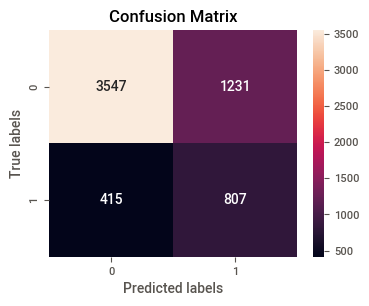

In [21]:
matrix_conf(target_train, predictions_train)

Модель сделала 1646 ошибку. Плохо прогнозируется класс "1".

В таблице ниже представлены средние значения метрик на соответствующем тесте при подборе параметров и кросс-валидации: 

In [22]:
results = mean_test_scorer(grid_search_logistic_regression)
results.head(10)

,f1,auc_roc,precision,recall,accuracy
22,0.498,0.704,0.399,0.664,0.728
15,0.498,0.704,0.398,0.664,0.727
19,0.496,0.703,0.395,0.669,0.724
23,0.493,0.701,0.389,0.673,0.718
11,0.493,0.699,0.396,0.652,0.727
26,0.493,0.701,0.391,0.669,0.720
18,0.491,0.701,0.385,0.680,0.713
27,0.489,0.699,0.383,0.678,0.712
7,0.489,0.694,0.397,0.637,0.729
31,0.488,0.698,0.381,0.679,0.710


In [23]:
scorers_result = model_result('log_reg_disbalance', results).join(scorers_result) #сохранение результатов

#### Подбор параметров с устранением дисбаланса

In [24]:
%%time
best_model_logistic_regression = None
best_scorer_logistic_regression = 0

best_penalty = None
best_C = None
best_class_weight = None

results = pd.DataFrame() # сюда запишем метрики на каждом шаге цикла с помощью функции quality()

for penalty in ('l1', 'l2'):
    for C in np.logspace(-4, 4, 20):
        for class_weight in (None, 'balanced'):
            model_logistic_regression = LogisticRegression(random_state=12345, solver='liblinear', penalty=penalty, \
                                        C=C, class_weight=class_weight)     
            model_logistic_regression.fit(features_upsampled, target_upsampled)
            predictions_train = model_logistic_regression.predict(features_train)
            predictions_valid = model_logistic_regression.predict(features_valid)
            scorer = f1_score(predictions_train, target_train)
            results = pd.concat([results,quality(model_logistic_regression, predictions_train, \
                           target_train)], ignore_index=True)
            
            if scorer > best_scorer_logistic_regression:
                best_model_logistic_regression = model_logistic_regression
                best_scorer_logistic_regression = scorer
                
                best_penalty = penalty
                best_C = C
                best_class_weight = class_weight
                       
            
print("f1 на тренировочной выборке: {:.3f}".format(best_scorer_logistic_regression))
print("Параметры лучшей модели: 'C':  {:.18f}, 'class_weight': '{}', 'penalty': '{}'".format(best_C, best_class_weight,\
                                                                               best_penalty))    
            

f1 на тренировочной выборке: 0.500
Параметры лучшей модели: 'C':  0.004832930238571752, 'class_weight': 'balanced', 'penalty': 'l1'
CPU times: total: 2.69 s
Wall time: 2.68 s


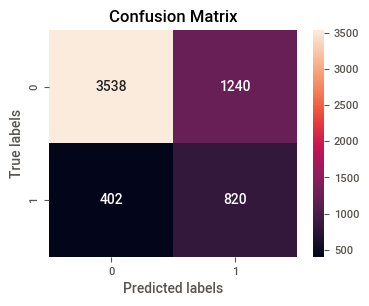

In [25]:
matrix_conf(target_train, best_model_logistic_regression.predict(features_train))

Модель сделала 1642 ошибки. Плохо прогнозируется класс "1".

В таблице ниже представлены значения метрик на соответствующем тесте при подборе параметров:

In [26]:
results = results.sort_values(by='f1', ascending=False)
results.head(10)

,f1,auc_roc,precision,recall,accuracy
9,0.500,0.760,0.398,0.671,0.726
47,0.499,0.765,0.399,0.665,0.728
8,0.498,0.760,0.393,0.678,0.722
44,0.497,0.761,0.393,0.676,0.721
49,0.497,0.767,0.394,0.675,0.722
51,0.496,0.767,0.390,0.681,0.718
50,0.496,0.767,0.387,0.691,0.714
46,0.496,0.765,0.392,0.674,0.721
48,0.496,0.767,0.389,0.685,0.717
45,0.496,0.761,0.397,0.661,0.727


In [27]:
scorers_result = model_result('log_reg_balance', results).join(scorers_result) #сохранение результатов

### Решающее дерево

#### Подбор параметров без устранения дисбаланса

In [28]:
%%time

param_grid = {'max_depth': range (1,10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': range (3,10),
              'class_weight': [None, 'balanced']
}

scorers = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'auc_roc': make_scorer(roc_auc_score)
} 

model_decision_tree = DecisionTreeClassifier(random_state=12345)
grid_search_decision_tree = GridSearchCV(model_decision_tree, param_grid, cv=5, scoring=scorers, refit='f1')
grid_search_decision_tree.fit(features_train, target_train)
predictions_train = grid_search_decision_tree.best_estimator_.predict(features_train)


print("f1 на тренировочной выборке: {:.3f}".format(grid_search_decision_tree.best_score_)) 
print("Параметры лучшей модели:", grid_search_decision_tree.best_params_)

f1 на тренировочной выборке: 0.570
Параметры лучшей модели: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3}
CPU times: total: 21.2 s
Wall time: 21.2 s


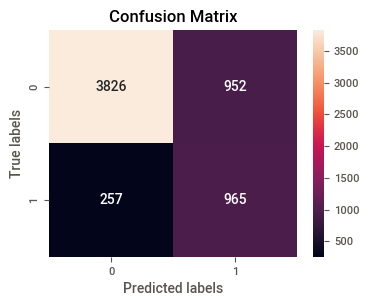

In [29]:
matrix_conf(target_train, predictions_train)

Модель сделала 1056 ошибки. Класс `"1"` прогнозируется лучше, чем в модели `LogisticRegression`. Все еще много предсказаний `FP`.

В таблице ниже представлены средние значения метрик на соответствующем тесте при подборе параметров и кросс-валидации:

In [30]:
results = mean_test_scorer(grid_search_decision_tree)
results.head(10)

,f1,auc_roc,precision,recall,accuracy
231,0.570,0.761,0.464,0.746,0.769
169,0.569,0.763,0.455,0.760,0.764
168,0.569,0.763,0.456,0.759,0.765
170,0.569,0.762,0.457,0.756,0.766
237,0.569,0.760,0.463,0.741,0.770
232,0.569,0.758,0.467,0.736,0.772
233,0.569,0.758,0.466,0.736,0.772
234,0.569,0.759,0.464,0.741,0.770
236,0.568,0.759,0.463,0.738,0.771
171,0.568,0.763,0.455,0.760,0.764


In [31]:
scorers_result = model_result('dec_tree_disbalance', results).join(scorers_result)#сохранение результатов

#### Подбор параметров с устранением дисбаланса

In [32]:
%%time
best_model_decision_tree = None
best_scorer_decision_tree = 0

best_max_depth = None
best_min_samples_leaf = None
best_criterion = None
best_class_weight = None

results = pd.DataFrame() # сюда запишем метрики на каждом шаге цикла с помощью функции quality()

for max_depth in range(1, 10):
    for min_samples_leaf in range(3, 10):
        for criterion in ('gini', 'entropy'):
            for class_weight in (None, 'balanced'):
                model_decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, \
                                      min_samples_leaf=min_samples_leaf, criterion=criterion, class_weight=class_weight)     
                model_decision_tree.fit(features_upsampled, target_upsampled)
                predictions_train = model_decision_tree.predict(features_train)
                predictions_valid = model_decision_tree.predict(features_valid)
                scorer = f1_score(predictions_train, target_train)
                if scorer > best_scorer_decision_tree:
                    best_model_decision_tree = model_decision_tree
                    best_scorer_decision_tree = scorer
                    
                    best_max_depth = max_depth
                    best_min_samples_leaf = min_samples_leaf
                    best_criterion = criterion
                    best_class_weight = class_weight
                
                results = pd.concat([results,quality(model_decision_tree, predictions_train, \
                           target_train)], ignore_index=True)
print("f1 на тренировочной выборке: {:.3f}".format(best_scorer_decision_tree))
print("Параметры лучшей модели: 'class_weight': '{}', 'criterion': '{}',  'max_depth':  {}, 'min_samples_leaf': '{}'".format(best_class_weight,\
                                                best_criterion, best_max_depth, best_min_samples_leaf))    
            

f1 на тренировочной выборке: 0.667
Параметры лучшей модели: 'class_weight': 'None', 'criterion': 'gini',  'max_depth':  9, 'min_samples_leaf': '3'
CPU times: total: 8.19 s
Wall time: 8.19 s


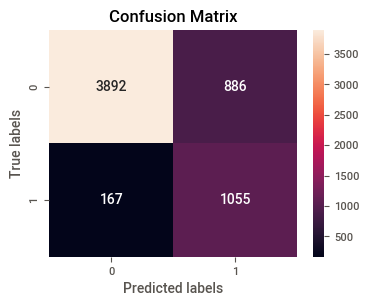

In [33]:
matrix_conf(target_train, best_model_decision_tree.predict(features_train))

Модель сделала 1053 ошибки. Класс `"1"` прогнозируется лучше, чем в модели без устранения дисбаланса. Все еще много предсказаний `FP`.

В таблице ниже представлены значения метрик на соответствующем тесте при подборе параметров:

In [34]:
results = results.sort_values(by='f1', ascending=False)
results.head(10)

,f1,auc_roc,precision,recall,accuracy
224,0.667,0.928,0.544,0.863,0.824
249,0.667,0.922,0.557,0.830,0.831
225,0.667,0.928,0.544,0.863,0.824
248,0.666,0.922,0.557,0.830,0.831
229,0.665,0.927,0.541,0.863,0.823
228,0.665,0.927,0.541,0.863,0.823
233,0.662,0.925,0.538,0.860,0.821
232,0.661,0.925,0.537,0.860,0.821
244,0.659,0.923,0.536,0.854,0.820
245,0.659,0.923,0.537,0.854,0.820


In [35]:
scorers_result = model_result('dec_tree_balance', results).join(scorers_result) #сохранение результатов

### Cлучайный лес

#### Подбор параметров без устранения дисбаланса

In [36]:
%%time

param_grid = {'n_estimators': range (1,100,5),
              'max_depth': range (1,10),
              'class_weight': [None, 'balanced']
}
scorers = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'auc_roc': make_scorer(roc_auc_score)
          } 

model_random_forest = RandomForestClassifier(random_state=12345)
grid_search_random_forest = RandomizedSearchCV(model_random_forest, param_grid, cv=5, scoring=scorers, refit='f1', random_state=12345)
grid_search_random_forest.fit(features_train, target_train)
predictions_train = grid_search_random_forest.best_estimator_.predict(features_train)


print("f1 на тренировочной выборке: {:.3f}".format(grid_search_random_forest.best_score_)) 
print("Параметры лучшей модели:", grid_search_random_forest.best_params_)

f1 на тренировочной выборке: 0.605
Параметры лучшей модели: {'n_estimators': 51, 'max_depth': 9, 'class_weight': 'balanced'}
CPU times: total: 6.45 s
Wall time: 6.46 s


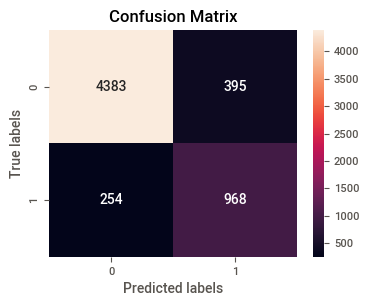

In [37]:
matrix_conf(target_train, predictions_train)

Модель сделала 638 ошибок. Значительно снизилось количество предсказаний `FP` по сравнению с предыдущими моделями.

В таблице ниже представлены средние значения метрик на соответствующем тесте при подборе параметров и кросс-валидации:

In [38]:
results = mean_test_scorer(grid_search_random_forest)
results.head(10)

,f1,auc_roc,precision,recall,accuracy
8,0.605,0.755,0.594,0.619,0.836
1,0.575,0.758,0.484,0.711,0.786
4,0.540,0.730,0.457,0.661,0.771
5,0.520,0.716,0.433,0.654,0.754
3,0.518,0.678,0.835,0.376,0.858
7,0.505,0.678,0.651,0.413,0.835
2,0.502,0.670,0.838,0.358,0.855
9,0.499,0.669,0.847,0.354,0.855
6,0.222,0.562,0.886,0.128,0.819
0,0.115,0.531,1.000,0.061,0.809


In [39]:
scorers_result = model_result('rand_forest_disbalance', results).join(scorers_result)#сохранение результатов

#### Подбор параметров с устранением дисбаланса

In [40]:
%%time
best_model_random_forest = None
best_scorer_random_forest = 0

best_max_depth = None
best_n_estimators = None
best_class_weight = None


results = pd.DataFrame() # сюда запишем метрики на каждом шаге цикла с помощью функции quality()

for max_depth in range(1, 10):
    for n_estimators in range(1,100,5):
        for class_weight in (None, 'balanced'):
            model_random_forest = RandomForestClassifier(random_state=12345, max_depth=max_depth, \
                                  n_estimators=n_estimators, class_weight=class_weight)     
            model_random_forest.fit(features_upsampled, target_upsampled)
            predictions_train = model_random_forest.predict(features_train)
            predictions_valid = model_random_forest.predict(features_valid)
            scorer = f1_score(predictions_train, target_train)
            if scorer > best_scorer_random_forest:
                best_model_random_forest = model_random_forest
                best_scorer_random_forest = scorer
                    
                best_max_depth = max_depth
                best_n_estimators = n_estimators
                best_class_weight = class_weight
                
            results = pd.concat([results,quality(model_random_forest, predictions_train, \
                           target_train)], ignore_index=True)
print("f1 на тренировочной выборке: {:.3f}".format(best_scorer_random_forest))
print("Параметры лучшей модели: 'n_estimators': '{}', 'max_depth':  {}, 'class_weight': '{}'".format(best_n_estimators,\
                                                best_max_depth, best_class_weight))    

f1 на тренировочной выборке: 0.761
Параметры лучшей модели: 'n_estimators': '76', 'max_depth':  9, 'class_weight': 'balanced'
CPU times: total: 1min 41s
Wall time: 1min 41s


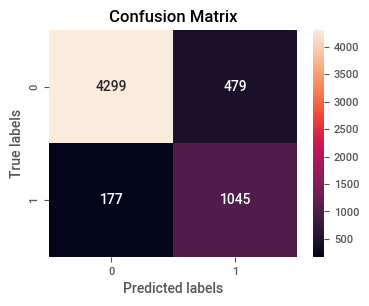

In [41]:
matrix_conf(target_train, best_model_random_forest.predict(features_train))

Модель сделала 666 ошибок. Улучшилось предсказание класса `1` по сравнению с предыдущей моделью, но увеличилось количество предсказаний `FP`.

В таблице ниже представлены значения метрик на соответствующем тесте при подборе параметров:

In [42]:
results = results.sort_values(by='f1', ascending=False)
results.head(10)

,f1,auc_roc,precision,recall,accuracy
359,0.761,0.954,0.684,0.858,0.890
351,0.761,0.954,0.686,0.855,0.891
345,0.760,0.953,0.683,0.857,0.890
357,0.760,0.954,0.681,0.859,0.890
355,0.760,0.955,0.683,0.856,0.890
353,0.760,0.954,0.684,0.856,0.890
349,0.760,0.953,0.684,0.856,0.890
347,0.759,0.953,0.684,0.853,0.890
343,0.758,0.952,0.684,0.849,0.889
337,0.756,0.952,0.677,0.854,0.888


In [43]:
scorers_result = model_result('rand_forest_balance', results).join(scorers_result) #сохранение результатов

**Вывод**

При условии максимизации метрики `f1`, результаты работы лучших моделей на тренировочной выборке выглядят следующим образом:

In [44]:
scorers_result

,rand_forest_balance,rand_forest_disbalance,dec_tree_balance,dec_tree_disbalance,log_reg_balance,log_reg_disbalance
f1,0.761,0.605,0.667,0.570,0.500,0.498
auc_roc,0.954,0.755,0.928,0.761,0.760,0.704
precision,0.684,0.594,0.544,0.464,0.398,0.399
recall,0.858,0.619,0.863,0.746,0.671,0.664
accuracy,0.890,0.836,0.824,0.769,0.726,0.728


Пороговому значению `f1` > 0.59 соответствуют 3 модели: `random_forest_disbalance`, `random_forest_balance` и  `decision_tree_balance`.

## Тестирование модели

Проверим модели на валидационной выборке. 

### Модель decision_tree_balance

In [45]:
predictions_valid = best_model_decision_tree.predict(features_valid)
predictions_train = best_model_decision_tree.predict(features_train)

probabilities_train = best_model_decision_tree.predict_proba(features_train)
probabilities_one_train = probabilities_train[:, 1]
auc_roc_train = roc_auc_score(target_train, probabilities_one_train)

probabilities_valid = best_model_decision_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)

print("f1 на тренировочной выборке: {:.3f}".format(best_scorer_decision_tree))
print("f1 на валидационной выборке: {:.3f}".format(f1_score(target_valid, predictions_valid)))
print("auc_roc на тренировочной выборке: {:.3f}".format(auc_roc_train))
print("auc_roc на валидационной выборке: {:.3f}".format(auc_roc_valid))

f1 на тренировочной выборке: 0.667
f1 на валидационной выборке: 0.529
auc_roc на тренировочной выборке: 0.928
auc_roc на валидационной выборке: 0.775


Значение метрики `auc_roc` на валидационной выборке значительно снизилось. Порог метрики `f1` - `0.59` не достигнут.

### Модель random_forest_disbalance

In [46]:
predictions_valid = grid_search_random_forest.best_estimator_.predict(features_valid)
predictions_train = grid_search_random_forest.best_estimator_.predict(features_train)

probabilities_train = grid_search_random_forest.best_estimator_.predict_proba(features_train)
probabilities_one_train = probabilities_train[:, 1]
auc_roc_train = roc_auc_score(target_train, probabilities_one_train)

probabilities_valid = grid_search_random_forest.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)

print("f1 на тренировочной выборке: {:.3f}".format(grid_search_random_forest.best_score_))
print("f1 на валидационной выборке: {:.3f}".format(f1_score(target_valid, predictions_valid)))
print("auc_roc на тренировочной выборке: {:.3f}".format(auc_roc_train))
print("auc_roc на валидационной выборке: {:.3f}".format(auc_roc_valid))

f1 на тренировочной выборке: 0.605
f1 на валидационной выборке: 0.607
auc_roc на тренировочной выборке: 0.948
auc_roc на валидационной выборке: 0.849


Порог метрики `f1` - `0.59` достигнут.

### Модель random_forest_balance

In [47]:
predictions_valid = best_model_random_forest.predict(features_valid)
predictions_train = best_model_random_forest.predict(features_train)

probabilities_train = best_model_random_forest.predict_proba(features_train)
probabilities_one_train = probabilities_train[:, 1]
auc_roc_train = roc_auc_score(target_train, probabilities_one_train)

probabilities_valid = best_model_random_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)

print("f1 на тренировочной выборке: {:.3f}".format(best_scorer_random_forest))
print("f1 на валидационной выборке: {:.3f}".format(f1_score(target_valid, predictions_valid)))
print("auc_roc на тренировочной выборке: {:.3f}".format(auc_roc_train))
print("auc_roc на валидационной выборке: {:.3f}".format(auc_roc_valid))

f1 на тренировочной выборке: 0.761
f1 на валидационной выборке: 0.610
auc_roc на тренировочной выборке: 0.954
auc_roc на валидационной выборке: 0.853


Порог метрики `f1` - `0.59` достигнут. 

Переобучим модель `random_forest_balance` на данных `train` + `valid` и проверим ее на тестовой выборке.

In [48]:
features_train = pd.concat([features_train,features_valid], ignore_index=True)
target_train = pd.concat([target_train,target_valid], ignore_index=True)

features_upsampled, target_upsampled = upsample(features_train, target_train, 4) #устранение дисбаланса

best_model_random_forest.fit(features_upsampled, target_upsampled)
predictions_test = best_model_random_forest.predict(features_test)

probabilities_test = best_model_random_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_test = roc_auc_score(target_test, probabilities_one_test)

print("f1 на тестовой выборке: {:.3f}".format(f1_score(target_test, predictions_test)))
print("auc_roc на тестовой выборке: {:.3f}".format(auc_roc_test))

f1 на тестовой выборке: 0.644
auc_roc на тестовой выборке: 0.873


Порог метрики `f1` - `0.59` на тестовой выборке достигнут. График ROC-кривой для финальной модели выглядит следующим образом:

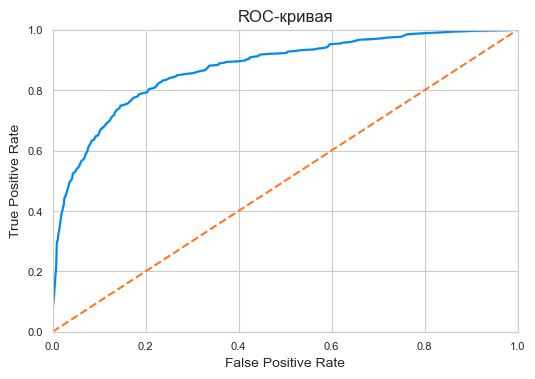

In [49]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
sns.set_style("whitegrid")
sns.lineplot(x=fpr, y=tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Вывод**

Рабочей моделью для предсказания поведения клиентов Банка признана модель `"Cлучайный лес"` с применением функции балансировки классов и следующими параметрами:

In [50]:
best_model_random_forest

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=76,
                       random_state=12345)

In [51]:
print("f1 модели на тестовой выборке: {:.3f}".format(f1_score(target_test, predictions_test)))

f1 модели на тестовой выборке: 0.644
